# 안녕하세요 투빅스 보충 과제입니다 :)

안녕하세요 투빅스 12기 김태한입니다 :)

이번 과제는 코로나 바이러스로 예상치 못한 휴식시간이 생겨 여러분의 딥러닝 감을 유지하고자 드리게 되었습니다.  

투빅이분들이라면 분명 쉽게 해낼거라 믿습니다!!


모르시는 거 있으시면 저 그리고 12기 멘토분들을 많이 많이 괴롭혀주세요!!!

# Assignment 1

여러분들은 저번 과제로 뉴럴넷 구현을 이미 한번 하셨습니다!  

사실 이번 과제의 최종 목적도 뉴럴넷 구현인데요 이미 한번 하셨고 실력들이 워낙 출중하셔서 금방금방 하실수 있으실거에요.  

구현에 바로 들어가기에 앞서 전체 네트워크 구조와 각 구성요소의 행렬 차원 및 오차역전파(back propagation) 복습이 1번 과제입니다.  

**?** 에 들어갈 수식을 채워주시면 됩니다!!  

## Matrix Shape 정리

n : sample_data 수  
d : input_dimension  
h : hidden_layer_dimension  
c : output_dimension  

X : input_data  
W1 : layer1_weight  
b1 : layer1_bias  
H : X*W1+b1
A : activation function 거친 value
W2 : layer2_weight  
b2 : layer2_bias  
S : A*W2+b2  
P : softmax 거친 value  

**X==(n,d)  
W1==(d,h) 채워주세요  
b1==(h,)  
H==(n,h) 채워주세요  
A==(n,h)  
W2==(h,c)  
b2==(c,) 채워주세요  
S==(n,c) 채워주세요  
P==(n,c)**

## Matrix 미분 정리
$H = XW+b　　　(n,h) = (n,d)x(d,h)+(h,)$  
$L = f(H)$  
$\frac{\partial L}{\partial W} = \frac{\partial H}{\partial W} \times \frac{\partial L}{\partial H} = X * \frac{\partial L}{\partial H}$ 　채워주세요  
$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial H} \times \frac{\partial H}{\partial X} = \frac{\partial L}{\partial H} * X$ 　채워주세요  
$\frac{\partial L}{\partial b} = 1*\frac{\partial L}{\partial H}$  

## 2Layers Chain Rule 정리
**Forward** 

$H = XW_{1} + b$  
$A = ReLU(H)$  
$S = AW_{2} + b_{2}$  
$P = Softmax(S)$  
$L = -LogLikelihood(P)$


**Backward**

$\frac{\partial L}{\partial S} = P-T$　:　T는 Label  
$\frac{\partial L}{\partial W_{2}} = \frac{\partial S}{\partial W_{2}}\frac{\partial L}{\partial S} = A * (P-T)$ 　채워주세요  
$\frac{\partial L}{\partial b_{2}} = 1*\frac{\partial L}{\partial S} = P-T$  
$\frac{\partial L}{\partial A} = \frac{\partial L}{\partial S}\frac{\partial S}{\partial A} = (P-T) * W_{2}$　채워주세요  
$\frac{\partial L}{\partial H} = \frac{\partial A}{\partial H}\frac{\partial L}{\partial A}$  
$\frac{\partial L}{\partial W_{1}} = \frac{\partial H}{\partial W_{1}}\frac{\partial L}{\partial H} = X^{T}\frac{\partial L}{\partial H}$  
$\frac{\partial L}{\partial b_{1}} = \frac{\partial L}{\partial H}$  

# Assignment 2

같이 드린 파일중 model.py라는 파일이 있을거에요!!!  
그 친구의 빈칸을 채워주시면 되겠습니다~!!  
model.py의 함수는 assignment3의 모델 만들기에서 사용되니 참고하시면서 채워주시면 도움이 될거에요!

# Assignment 3

자 이제 저희가 구현한 모델을 가지고 한번 cifar-10 dataset을 학습해볼게요!!  
근데 시작하기에 앞서 pip install keras 를 해주세요!!  

3번과제의 목적은 하이퍼파라미터를 튜닝하던 다른방법을 사용하던 해서 마지막에 그림그리기에서 높은 validation accuracy가 나오도록 하는 과제입니다!!  

모델을 2층이아니라 본인만의 3층으로 발전시켜도 좋구요 다른 여러가지 방법들이 있겠죠!?!?!?  

가장 높은 validation accuracy를 뽑으신 분께 상품을 드리겠습니다아~!!!

### 데이터 load

keras 프레임워크를 이용하여 데이터를 로드해 옵니다.  
32*32*3차원의 데이터를 3072차원으로 바꾸는 것 까지 해드릴게요.
필요하면 sklearn.preprocessing의 scaler를 사용해보셔도 좋습니다!

In [2]:
from keras.datasets import cifar10
import numpy as np
from Model import TwoLayerNet
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [35]:
# model.py 가 import가 안되서 직접 가져옴 ㅠ
import math

class TwoLayerNet():
    """
    2 Layer Network를 만드려고 합니다.

    해당 네트워크는 아래의 구조를 따릅니다.

    input - Linear - ReLU - Linear - Softmax

    Softmax 결과는 입력 N개의 데이터에 대해 개별 클래스에 대한 확률입니다.
    """

    def __init__(self, X, input_size, hidden_size, output_size, std=1e-4):
         """
         네트워크에 필요한 가중치들을 initialization합니다.
         initialized by random values
         해당 가중치들은 self.params 라는 Dictionary에 담아둡니다.

         input_size: 데이터의 변수 개수 - D
         hidden_size: 히든 층의 H 개수 - H
         output_size: 클래스 개수 - C

         """

         self.params = {}
         self.params["W1"] = std * np.random.randn(input_size, hidden_size)
         self.params["b1"] = np.random.randn(hidden_size)
         self.params["W2"] = std * np.random.randn(hidden_size, output_size)
         self.params["b2"] = np.random.randn(output_size)

    def forward(self, X, y=None):

        """

        X: input 데이터 (N, D)
        y: 레이블 (N,)

        Linear - ReLU - Linear - Softmax - CrossEntropy Loss

        y가 주어지지 않으면 Softmax 결과 p와 Activation 결과 a를 return합니다. p와 a 모두 backward에서 미분할때 사용합니다.
        y가 주어지면 CrossEntropy Error를 return합니다.

        """
        # W1 == (D,H), b1 == (H,)
        W1, b1 = self.params["W1"], self.params["b1"]
        # W2 == (H,C), b2 == (C,)
        W2, b2 = self.params["W2"], self.params["b2"]
        N, D = X.shape # X == (N,D)

        # 여기에 p를 구하는 작업을 수행하세요.
        
        # Linear1 계층
        h = np.dot(X, W1) + b1  # H == (N,H)
        
        # ReLU 계층
        mask = (h <= 0)
        a = h.copy()
        a[mask] = 0 # a == (N,H)
        
        # Linear2 계층
        o = np.dot(a, W2) + b2 # h2 == (N,C)
        
        # softmax 계층
        '''
        def softmax(x):
            e_x = np.exp(x - np.max(x))
            return e_x / e_x.sum()
        '''
#         o = np.exp(h2 - np.max(h2, axis=1).reshape(-1,1))
        p = np.exp(o)/np.sum(np.exp(o),axis=1).reshape(-1,1) # p == (N,C)

        if y is None:
            return p, a
        
        # 여기에 Loss를 구하는 작업을 수행하세요.(y가 있는 상태)
        log_likelihood = 0
        i = 0
        for q in y:
            log_likelihood -= np.log(p[i,q])
            i += 1
            
        Loss = log_likelihood / N # N은 데이터 개수

#         print('loss : ',Loss)

        return Loss



    def backward(self, X, y, learning_rate=1e-5):
        """

        X: input 데이터 (N, D)
        y: 레이블 (N,)

        grads에는 Loss에 대한 W1, b1, W2, b2 미분 값이 기록됩니다.

        원래 backw 미분 결과를 return 하지만
        여기서는 Gradient Descent방식으로 가중치 갱신까지 합니다.

        """
        W1, b1 = self.params["W1"], self.params["b1"]
        W2, b2 = self.params["W2"], self.params["b2"]
        N = X.shape[0] # 데이터 개수
        grads = {}
        
        p, a = self.forward(X)
        
        # 여기에 파라미터에 대한 미분을 저장하세요.

        # softmax backpropagation
        # 요컨대 Softmax-with-Loss 노드의 역전파 그래디언트를 구하려면 입력값에 소프트맥스 확률값을 취한 뒤, 정답 레이블에 해당하는 요소만 1을 빼주면 된다는 얘기
        dp = p
        for i in range(p.shape[0]):
            for j in range(p.shape[1]):
                if(j==y[i]):
                    dp[i][j]-=1 # p-y
        # linear2 backpropagation
        
        
        
        # ReLU backpropagation..?
        '''
                            0 if x1 < 0
        heaviside(x1, x2) = x2 if x1 == 0
                            1 if x1 > 0
        '''
        da = np.heaviside(a,0)

        # linear1 backpropagation
        dl = np.dot(dp, W2.T)
        dc = dl * da
        
        grads["W2"] = np.dot(a.T, dp)
        grads["b2"] = np.sum(dp,axis=0)
        grads["W1"] = np.dot(X.T, dc)
        grads["b1"] = np.sum(dc, axis=0)

        self.params["W2"] -= learning_rate * grads["W2"]
        self.params["b2"] -= learning_rate * grads["b2"]
        self.params["W1"] -= learning_rate * grads["W1"]
        self.params["b1"] -= learning_rate * grads["b1"]

    def accuracy(self, X, y):

        p, _ = self.forward(X)
        
        
        pre_p = np.argmax(p,axis=1)

        return np.sum(pre_p==y)/pre_p.shape[0]


In [48]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [49]:
def preprocessing_data(x_train, x_test, y_train, y_test):
    #change dtype
    x_train = np.array(x_train, dtype=np.float64)
    x_test = np.array(x_test, dtype=np.float64)
    
    #reshaping
    x_train = np.reshape(x_train, (x_train.shape[0], -1))
    x_test = np.reshape(x_test, (x_test.shape[0], -1))
    
    y_train = np.reshape(y_train, (y_train.shape[0],))
    y_test = np.reshape(y_test, (y_test.shape[0],))
        
    #normalizing
    mean_value = np.mean(x_train, axis=0)
    x_train -= mean_value
    x_test -= mean_value
    
    return x_train, x_test, y_train, y_test

In [50]:
x_train, x_test, y_train, y_test = preprocessing_data(x_train, x_test, y_train, y_test)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000,)
(10000,)


데이터가 너무 많아서 5000개랑 1000개만 사용해보도록 할게요

In [52]:
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

### 데이터 확인

실제 데이터가 어떻게 생겼는지 한번 봅시다

In [53]:
x_train

array([[ -71.71074,  -74.05614,  -69.5538 , ...,   -3.63908,  -33.8503 ,
         -42.38186],
       [  23.28926,   40.94386,   54.4462 , ...,   16.36092,    7.1497 ,
          29.61814],
       [ 124.28926,  118.94386,  122.4462 , ...,  -46.63908,  -39.8503 ,
         -30.38186],
       ...,
       [  36.28926,   26.94386,   12.4462 , ...,  -84.63908,  -47.8503 ,
         -30.38186],
       [  23.28926,   15.94386,   -7.5538 , ...,   67.36092,  121.1497 ,
          -0.38186],
       [ -85.71074, -104.05614, -111.5538 , ...,   29.36092,   16.1497 ,
         -14.38186]])

### 하이퍼파라미터 설정

이제 하이퍼파라미터를 설정해볼게요.  
hidden_size, epoch_size, batch_size, learning_rate등은 전부 하이퍼 파라미터이니 바꾸면서 도전해보세요!!

In [54]:
input_size = 32 * 32 * 3
hidden_size = 50
output_size = 10
epoch_size = 1000
batch_size = 300
learning_rate = 0.0001
N = x_train.shape[0]

### 모델 만들기

input_size, hidden_size, output_size는 데이터에 맞게 잘 설정해주세요.

In [55]:
batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
x_batch = x_train[batch_mask]

In [56]:
nn = TwoLayerNet(x_batch, input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [57]:
import time

In [58]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

start_time = time.time()
#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        nn.backward(x_batch, t_batch) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))
    
    if i % 10 == 0:
        print(i, "test accuracy :", nn.accuracy(x_test, y_test))
        print(i, "test loss     :", nn.forward(x_test, y_test))

end_time = time.time()

print((end_time - start_time)/ 60)

0 test accuracy : 0.243
0 test loss     : 2.0969261719458863
10 test accuracy : 0.333
10 test loss     : 1.8373939310237002
20 test accuracy : 0.259
20 test loss     : 2.5228522038372376
30 test accuracy : 0.317
30 test loss     : 2.237423661398478
40 test accuracy : 0.364
40 test loss     : 1.9206636889675905
50 test accuracy : 0.228
50 test loss     : 5.674457397617458


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: overflow encountered in exp
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less_equal


60 test accuracy : 0.103
60 test loss     : nan
70 test accuracy : 0.103
70 test loss     : nan
80 test accuracy : 0.103
80 test loss     : nan
90 test accuracy : 0.103
90 test loss     : nan
100 test accuracy : 0.103
100 test loss     : nan
110 test accuracy : 0.103
110 test loss     : nan
120 test accuracy : 0.103
120 test loss     : nan
130 test accuracy : 0.103
130 test loss     : nan
140 test accuracy : 0.103
140 test loss     : nan


KeyboardInterrupt: 

### 그림 그리기

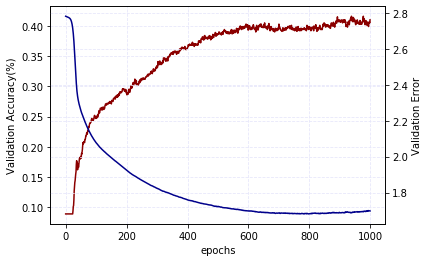

나의 최고 validation loss :  0.416


In [84]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation loss : ",max(history['val_acc']))

In [1]:
input_size = 32 * 32 * 3
hidden_size = [50, 100, 150]
output_size = 10
epoch_size = 1000
batch_size = [300, 500, 700]
learning_rate = [0.00001, 0.000001, 0.0000001]
N = x_train.shape[0]

NameError: name 'x_train' is not defined

In [ ]:
for batch_size in batch_sizes:
    batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
    x_batch = x_train[batch_mask]

    for 
    nn = TwoLayerNet(x_batch, input_size=input_size, hidden_size=hidden_size, output_size=output_size)

    history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

    #코드를 보며 epoch, batch에 대해서 이해해봅시다.
    for i in range(epoch_size):
        for j in range(N//batch_size):
            batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
            x_batch = x_train[batch_mask]
            t_batch = y_train[batch_mask]
            nn.backward(x_batch, t_batch, learning_rate) # 가중치 갱신

        #accuracy와 loss를 기록해둡시다.
        history["val_acc"].append(nn.accuracy(x_test, y_test))
        history["val_loss"].append(nn.forward(x_test, y_test))

        if i % 10 == 0:
            print(i, "test accuracy :", nn.accuracy(x_test, y_test))
            print(i, "test loss     :", nn.forward(x_test, y_test))

